# Практична робота №7
## Завдання 2
## Авдєєва Серафима ФІТ 4-4

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import seaborn as sns

# 1. Завантаження датасету
dataset = pd.read_csv("E:/University/матеріали лекцій/МН матеріали/МН лаби/МН лаб 7/museum_visitors.csv", encoding='unicode_escape')

In [152]:
# 2. Виведення перших 5 рядків датасету
print(dataset.head(5))

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [153]:
# 3. Попередній аналіз даних
print("Розмір датасету:", dataset.shape, "\n")
print("Типи даних:")
print(dataset.dtypes, "\n")
print("Кількість пропусків:")
print(dataset.isnull().sum())

Розмір датасету: (59, 5) 

Типи даних:
Date                                    object
Avila Adobe                              int64
Firehouse Museum                         int64
Chinese American Museum                  int64
America Tropical Interpretive Center     int64
dtype: object 

Кількість пропусків:
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64


In [154]:
# 4. Видалення дублікатів
dataset = dataset.drop_duplicates()
print("Розмір таблиці без дублікатів:", dataset.shape)

Розмір таблиці без дублікатів: (59, 5)


In [155]:
# 5.Про які роки містить інформацію датасет.
dates = pd.to_datetime(dataset['Date'])
years = dates.dt.year
unique_years = years.unique()
print("Роки в датасеті:\n", unique_years)

Роки в датасеті:
 [2014 2015 2016 2017 2018]


In [156]:
# 6. Зміна назв стовпців
dataset.columns = dataset.columns.str.lower().str.replace(' ', '_')

In [157]:
print(dataset.head(5))

         date  avila_adobe  firehouse_museum  chinese_american_museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   america_tropical_interpretive_center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


In [158]:
# 7. Середня кількість відвідувачів для кожного музею
museum_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']
for museum in museum_columns:
    avg_visitors = dataset[museum].mean()
    print(f"Середня кількість відвідувачів для {museum}: {avg_visitors:.2f}")


Середня кількість відвідувачів для avila_adobe: 24061.66
Середня кількість відвідувачів для firehouse_museum: 6472.83
Середня кількість відвідувачів для chinese_american_museum: 2721.25
Середня кількість відвідувачів для america_tropical_interpretive_center: 7107.02


In [159]:
# 8. Мінімальна та максимальна кількість відвідувачів за 2018 рік
year_2018_data = dataset[dataset['date'].str.contains('2018')]
for museum in museum_columns:
    min_visitors_2018 = year_2018_data[museum].min()
    max_visitors_2018 = year_2018_data[museum].max()
    print(f"Мінімальна кількість відвідувачів для {museum} у 2018 році: {min_visitors_2018}")
    print(f"Максимальна кількість відвідувачів для {museum} у 2018 році: {max_visitors_2018}", "\n")


Мінімальна кількість відвідувачів для avila_adobe у 2018 році: 14718
Максимальна кількість відвідувачів для avila_adobe у 2018 році: 25173 

Мінімальна кількість відвідувачів для firehouse_museum у 2018 році: 3306
Максимальна кількість відвідувачів для firehouse_museum у 2018 році: 8013 

Мінімальна кількість відвідувачів для chinese_american_museum у 2018 році: 2146
Максимальна кількість відвідувачів для chinese_american_museum у 2018 році: 4960 

Мінімальна кількість відвідувачів для america_tropical_interpretive_center у 2018 році: 3180
Максимальна кількість відвідувачів для america_tropical_interpretive_center у 2018 році: 5837 



In [160]:
# 9. Місяці з найвищою та найнижчою загальною кількістю відвідувачів для 2015 року


# Отримання назв місяців
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Визначення місяця з найвищою і найнижчою кількістю відвідувачів для 2015 року
year_2015_data = dataset[dataset['date'].str.contains('2015')]
year_2015_data['month'] = pd.to_datetime(year_2015_data['date']).dt.month
monthly_total = year_2015_data.groupby('month')[museum_columns].sum()
min_month = monthly_total.sum(axis=1).idxmin()
max_month = monthly_total.sum(axis=1).idxmax()
min_month_name = month_names[min_month - 1]
max_month_name = month_names[max_month - 1]

print("Місяць з найвищою загальною кількістю відвідувачів у 2015 році:", max_month_name)
print("Місяць з найнижчою загальною кількістю відвідувачів у 2015 році:", min_month_name)

Місяць з найвищою загальною кількістю відвідувачів у 2015 році: May
Місяць з найнижчою загальною кількістю відвідувачів у 2015 році: February


In [161]:
# 10. Порівняння кількості відвідувачів музею "Avila Adobe" у літні та зимові місяці 2018 року
year_2018_data['month'] = pd.to_datetime(year_2018_data['date']).dt.month
summer_winter_data = year_2018_data[(year_2018_data['month'].isin([6, 7, 8])) | (year_2018_data['month'].isin([12, 1, 2]))]
avila_adobe_summer = summer_winter_data[summer_winter_data['month'].isin([6, 7, 8])]['avila_adobe'].sum()
avila_adobe_winter = summer_winter_data[summer_winter_data['month'].isin([12, 1, 2])]['avila_adobe'].sum()
print("Кількість відвідувачів музею Avila Adobe влітку 2018 року:", avila_adobe_summer)
print("Кількість відвідувачів музею Avila Adobe взимку 2018 року:", avila_adobe_winter)

Кількість відвідувачів музею Avila Adobe влітку 2018 року: 66122
Кількість відвідувачів музею Avila Adobe взимку 2018 року: 30983


In [162]:
# 11. Кореляція між кількістю відвідувачів та датами у 2016 році
year_2016_data = dataset[dataset['date'].str.contains('2016')]
year_2016_data['date']=pd.to_datetime(year_2016_data['date'])
year_2016_data['date']=pd.to_numeric(year_2016_data['date'])
correlation_matrix = year_2016_data.corr()
print("Матриця кореляції для 2016 року:")
print(correlation_matrix)

Матриця кореляції для 2016 року:
                                          date  avila_adobe  firehouse_museum  \
date                                  1.000000     0.060350         -0.201650   
avila_adobe                           0.060350     1.000000          0.737200   
firehouse_museum                     -0.201650     0.737200          1.000000   
chinese_american_museum              -0.415031     0.089054          0.553935   
america_tropical_interpretive_center -0.228172     0.436561          0.247389   

                                      chinese_american_museum  \
date                                                -0.415031   
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
date        

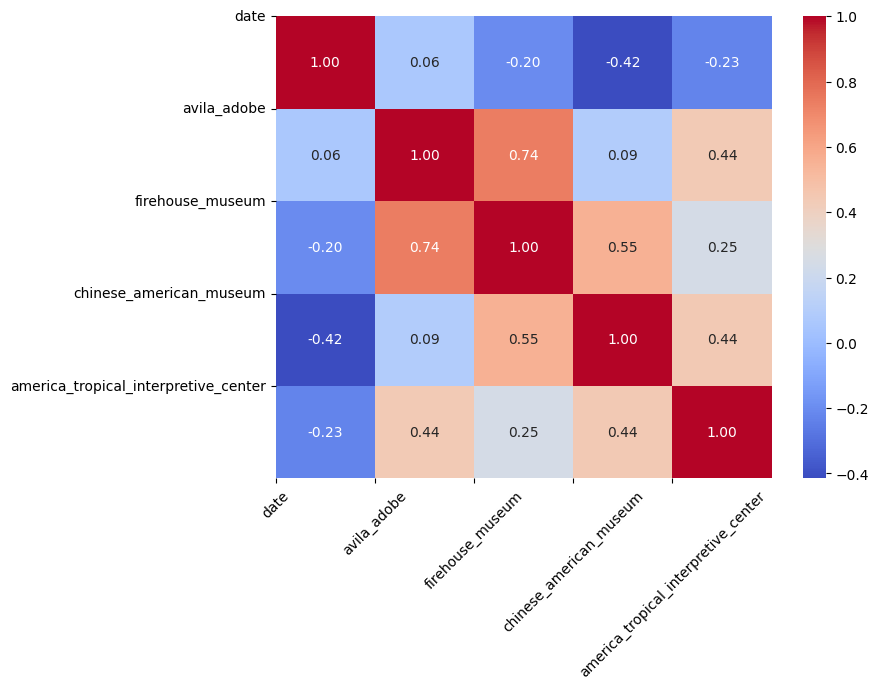

In [163]:
# 12. Побудова теплокарти кореляції
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.xticks(range(len(year_2016_data.columns)), year_2016_data.columns, rotation=45)
plt.yticks(range(len(year_2016_data.columns)), year_2016_data.columns)
plt.show()

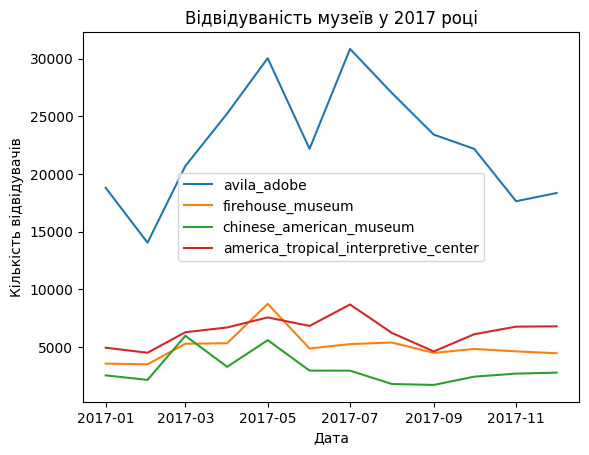

In [164]:
# 13. Побудова графіку ліній для відвідуваності музеїв протягом 2017 року
year_2017_data = dataset[dataset['date'].str.contains('2017')]
year_2017_data['date'] = pd.to_datetime(year_2017_data['date'])
for museum in museum_columns:
    plt.plot(year_2017_data['date'], year_2017_data[museum], label=museum)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв у 2017 році')
plt.legend()
plt.show()

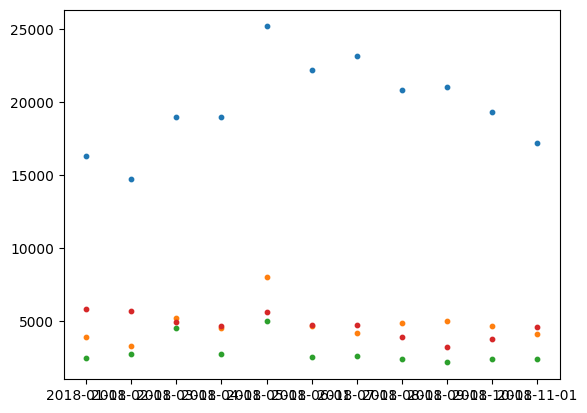

In [165]:
# 14. Побудова графіків розсіювання для кожного музею за 2018 рік
year_2018_data = dataset[dataset['date'].str.contains('2018')]
for museum in museum_columns:
    plt.scatter(year_2018_data['date'], year_2018_data[museum], label=museum, s=10)

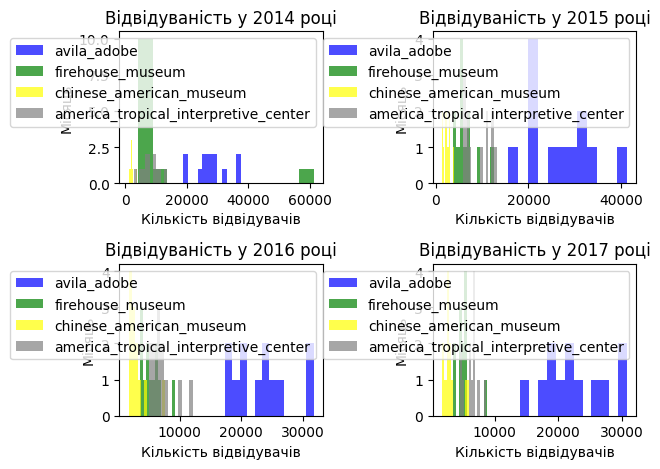

In [180]:
years = ['2014', '2015', '2016', '2017']
colors = ['blue', 'green', 'yellow', 'gray']

for i, year in enumerate(years):
    yearly_data = dataset[dataset['date'].str.contains(year)]
    monthly_visitors = yearly_data.groupby(yearly_data['date'].str.split('-').str[1])
    plt.subplot(2, 2, i + 1)
    for j, museum in enumerate(dataset.columns[1:]):
        plt.hist(monthly_visitors[museum].sum(), bins=12, color=colors[j], label=museum, alpha=0.7)
    plt.xlabel('Кількість відвідувачів')
    plt.ylabel('Місяць')
    plt.title(f'Відвідуваність у {year} році')
    plt.legend()

plt.tight_layout()
plt.show()

## Висновки

In [ ]:
# У цій роботі ми використали ряд бібліотек, таких як pandas та matplotlib,
# для аналізу та візуалізації даних, що стосуються відвідуваності музеїв протягом кількох років. 

# Підсумовуючи, у цій роботі ми успішно виконали наступні завдання:

# 1. Завантажили датасет з даними про відвідуваність музеїв.
# 2. Вивели перші 5 рядків датасету для огляду даних.
# 3. Провели попередній аналіз даних, включаючи розмір датасету, типи даних та виявили пропуски.
# 4. Перевірили наявність та видалили дублікати у датасеті.
# 5. Визначили роки, за якими є інформація у датасеті.
# 6. Змінили назви стовпців для зручності.
# 7. Обчислили середню кількість відвідувачів для кожного музею.
# 8. Знайшли мінімальну та максимальну кількість відвідувачів для кожного музею у 2018 році.
# 9. Визначили місяці з найвищою та найнижчою загальною кількістю відвідувачів у 2015 році.
# 10. Порівняли кількість відвідувачів музею "Avila Adobe" у літні та зимові місяці 2018 року.
# 11. Знайшли кореляцію між кількістю відвідувачів у музеях та датами у 2016 році.
# 12. Побудували теплокарту кореляції для аналізу зв'язків між музеями.
# 13. Побудували графіки ліній для відображення відвідуваності музеїв у 2017 році.
# 14. Побудували графіки розсіювання для кожного музею у 2018 році.
# 15. Побудували гістограми відвідуваності за місяцями для кожного музею протягом років 2014-2017.
# Ця робота дозволила отримати багато важливої інформації та побачити тенденції у відвідуваності 
# музеїв протягом років, що може бути корисно для подальшого аналізу та прийняття рішень у сфері культурної діяльності.